In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
%matplotlib inline

In [2]:
DATA_PATH = "../data/"

path = DATA_PATH + "Telco_data_clean.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,"PopulationBinned_(-1, 1000]","PopulationBinned_(1000, 5000]","PopulationBinned_(5000, 20000]","PopulationBinned_(20000, 40000]","PopulationBinned_(40000, 80000]","PopulationBinned_(80000, 120000]"
0,0,1,0.872912,0,-0.650362,-1.278897,0,1,-0.612931,0,...,0,1,0,0,0,0,0,0,1,0
1,1,1,0.762181,1,-0.317162,-0.993672,1,1,-0.172164,0,...,0,0,1,0,0,0,0,0,1,0
2,2,1,-1.032322,0,-0.650362,-0.586209,1,1,1.541931,0,...,0,1,0,0,0,0,0,0,1,0
3,3,1,0.791766,1,-0.317162,-0.300984,0,1,-0.417035,0,...,0,1,0,0,0,0,0,1,0,0
4,4,1,-1.358595,1,-0.317162,0.187973,1,1,-0.319086,0,...,0,1,0,0,0,0,0,1,0,0


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
target = 'Churn Label'
X = df.drop(target, axis=1)
Y = df[target]
training_features, testing_features, training_target, testing_target = train_test_split(X, Y,
                     test_size=0.2, train_size=None, random_state=None, shuffle=True, stratify=None)

In [7]:
training_features.head()

,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,...,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,"PopulationBinned_(-1, 1000]","PopulationBinned_(1000, 5000]","PopulationBinned_(5000, 20000]","PopulationBinned_(20000, 40000]","PopulationBinned_(40000, 80000]","PopulationBinned_(80000, 120000]"
6392,-0.670547,0,-0.650362,0.065733,0,1,-0.025242,1,0,1,...,0,0,1,0,0,1,0,0,0,0
3306,1.652248,0,-0.650362,1.125139,1,0,-1.004724,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2885,0.716537,1,0.016038,0.921407,0,0,-1.004724,0,0,0,...,1,1,0,0,0,0,1,0,0,0
6104,1.748609,0,-0.650362,1.247378,0,0,-1.004724,0,0,0,...,1,0,1,0,0,0,1,0,0,0
6973,-1.866601,0,-0.650362,-0.300984,0,0,-1.004724,0,0,0,...,0,0,1,0,0,0,0,0,1,0


#### Basic Algorithms

We start with some basic algorithms such as linear regression and random forests.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
seed = 0
# Logistic Regression
logreg = LogisticRegression(max_iter = 2000)

# Support Vector Machines
sup_vec = SVC(gamma = "auto")

# Random Forest Classifier
random_forest = RandomForestClassifier(random_state = seed, n_estimators = 100)

# KNN
knn = KNeighborsClassifier()

# Gaussian Naive Bayes
gauss_bayes = GaussianNB()

# Decision Tree Classifier
dec_tree = DecisionTreeClassifier(max_depth = 4,random_state = 0)

# Gradient Boosting Classifier
grad_boost = GradientBoostingClassifier(random_state = 0)

# Adaboost Classifier
adaboost = AdaBoostClassifier(random_state = 0)

# ExtraTrees Classifier
extra_trees = ExtraTreesClassifier(random_state = 0)

modelNames = ["Logistic Regression", "Support vector machines", "Random forests", "KNN", "Gaussian Naive Bayes", "Decision Trees", "Gradient Boosting Classifier", "Adaboost Classifier", "ExtraTrees Classifier"]
models = [logreg, sup_vec, random_forest, knn, gauss_bayes, dec_tree, grad_boost, adaboost, extra_trees]


In [10]:
def calculateTrainAccuracy(model):
    """Returns training accuracy of a model."""
    
    model.fit(training_features, training_target)
    accuracy = model.score(testing_features, testing_target)
    accuracy = round(accuracy*100, 2)
    return accuracy

In [11]:
scores = [calculateTrainAccuracy(model) for model in models]
Accuracy = pd.DataFrame(scores, columns = ["Accuracy"], index=modelNames)
sorted_accuracy = Accuracy.sort_values(by="Accuracy", ascending=False)
display(sorted_accuracy)

,Accuracy
Gradient Boosting Classifier,84.32
Adaboost Classifier,83.32
ExtraTrees Classifier,83.32
Support vector machines,83.18
Random forests,83.18
Logistic Regression,82.75
Decision Trees,80.06
KNN,79.63
Gaussian Naive Bayes,78.14


In [12]:
from sklearn.model_selection import cross_val_score
def Train_val_score(model):
    """Returns models' cross validation scores."""
    
    Training_cross_val = cross_val_score(model, training_features, training_target, cv = 10, scoring="accuracy").mean()
    Training_cross_val = round(Training_cross_val*100, 2)
    return Training_cross_val

# Calculate cross validation scores of all the models and store them in a dataframe
cross_scores = [Train_val_score(model) for model in models]
Training_cross_val = pd.DataFrame(cross_scores, columns = ["Train_cross_val"], index=modelNames)
sorted_cross_val = Training_cross_val.sort_values(by="Train_cross_val", ascending=False)
display(sorted_cross_val)

,Train_cross_val
Gradient Boosting Classifier,85.73
Random forests,84.91
Support vector machines,84.68
Adaboost Classifier,84.27
Logistic Regression,84.03
ExtraTrees Classifier,83.94
Decision Trees,81.56
KNN,80.87
Gaussian Naive Bayes,79.16


In [13]:
"""Define hyperparameters the logistic regression will be tuned with. For LR, the following hyperparameters are usually tunned."""
lrParams = {"penalty":["l1", "l2"],
            "C": np.logspace(0, 4, 10),
            "max_iter":[2000]}

"""For GBC, the following hyperparameters are usually tunned."""
gbcParams = {"learning_rate": [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1],
              "max_depth": [4, 6, 8, 9],
              "max_features": [1.0, 0.3, 0.1, 2.0, 1.5, 0.5], 
              "min_samples_split": [2, 3, 4],
              "random_state":[seed]}

svcParams = {"C": np.arange(6,13), 
              "kernel": ["linear","rbf"],
              "gamma": [0.5, 0.2, 0.1, 0.001, 0.0001]}

"""For DT, the following hyperparameters are usually tunned."""
dtParams = {"max_features": ["auto", "sqrt", "log2"],
             "min_samples_split": np.arange(2,16), 
             "min_samples_leaf":np.arange(1,12),
             "random_state":[seed]}
"""For RF, the following hyperparameters are usually tunned."""
rfParams = {"criterion":["gini","entropy"],
             "n_estimators":[10, 15, 20, 25, 30],
             "min_samples_leaf":[1, 2, 3],
             "min_samples_split":np.arange(3,8), 
             "max_features":["sqrt", "auto", "log2"],
             "random_state":[44]}

"""For KNN, the following hyperparameters are usually tunned."""
knnParams = {"n_neighbors":np.arange(3,9),
              "leaf_size":[1, 2, 3, 5],
              "weights":["uniform", "distance"],
              "algorithm":["auto", "ball_tree","kd_tree","brute"]}
"""For ABC, the following hyperparameters are usually tunned."""
abcParams = {"n_estimators":[1, 5, 10, 15, 20, 25, 40, 50, 60, 80, 100, 130, 160, 200, 250, 300],
              "learning_rate":[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
              "random_state":[seed]}

"""For ETC, the following hyperparameters are usually tunned."""
etcParams = {"max_depth":[None],
              "max_features":[1, 3, 10],
              "min_samples_split":[2, 3, 10],
              "min_samples_leaf":[1, 3, 10],
              "bootstrap":[False],
              "n_estimators":[100, 300],
              "criterion":["gini"], 
              "random_state":[seed]}


In [14]:
from sklearn.model_selection import GridSearchCV
def tuneHyperparameters(model, params):
    """Returns best score of a model and its corresponding hyperparameters.
    model = model to be optimized.
    params = hyperparameters the models will be optimized with."""
    
    print(model)
    # Construct grid search object with 10 fold cross validation.
    gridSearch = GridSearchCV(model, params, verbose=0, cv=10, scoring="accuracy", n_jobs = -1)
    # Fit using grid search.
    gridSearch.fit(training_features, training_target)
    bestParams, bestScore = gridSearch.best_params_, round(gridSearch.best_score_*100, 2)
    return bestScore, bestParams

In [15]:
"""Due to computational restrictions, I won't optimise xgbc's hyperparameters."""
modelNamesToTune = [x for x in modelNames if x not in ["GNB","XGBC"]]
modelsToTune = [logreg, sup_vec, random_forest, knn, dec_tree, grad_boost, adaboost, extra_trees]
parametersLists = [lrParams, svcParams, rfParams, knnParams, dtParams, gbcParams, abcParams, etcParams]
bestScoreAndHyperparameters = [tuneHyperparameters(model,param) for (model,param) in zip(modelsToTune,parametersLists)]

LogisticRegression(max_iter=2000)
SVC(gamma='auto')
RandomForestClassifier(random_state=0)
KNeighborsClassifier()
DecisionTreeClassifier(max_depth=4, random_state=0)
GradientBoostingClassifier(random_state=0)
AdaBoostClassifier(random_state=0)
ExtraTreesClassifier(random_state=0)


In [16]:
modelNamesToTune.remove('Gaussian Naive Bayes')

In [17]:
"""Let's create a dataframe to store best score and best params."""
bestScoreAndHyperparameters = pd.DataFrame(bestScoreAndHyperparameters,
                                             index=modelNamesToTune,
                                             columns=["tunedAccuracy", "bestHyperparameters"])
bestScoreAndHyperparametersSorted = bestScoreAndHyperparameters.sort_values(by="tunedAccuracy",
                                                                                ascending=False)
display(bestScoreAndHyperparametersSorted.iloc[:,0].to_frame())

,tunedAccuracy
Gradient Boosting Classifier,86.03
Random forests,84.98
Adaboost Classifier,84.84
ExtraTrees Classifier,84.75
Logistic Regression,84.08
Support vector machines,84.06
KNN,82.04
Decision Trees,79.68


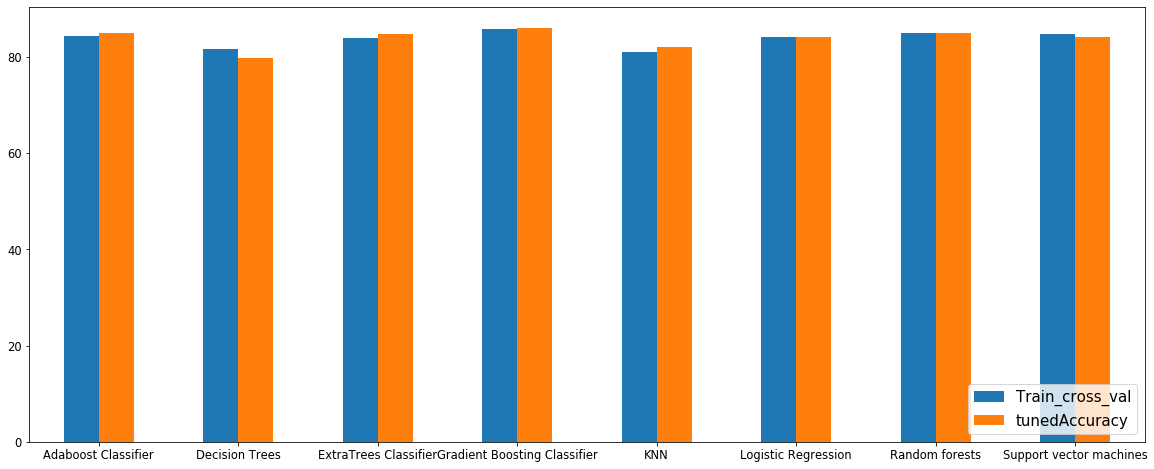

In [18]:
"""Create a function that compares cross validation scores with tunned scores for different models by
plotting them."""
def compareModelsAccuracy():
    """Returns a stack bar chart of tuned and x validation scores of models."""
    
    # Sort by index and converting to series object to plot.
    xValScore = sorted_cross_val[~sorted_cross_val.index.isin(["GNB"])].sort_index().T.squeeze()
    tunedScore = bestScoreAndHyperparametersSorted.iloc[:,0].sort_index().T.squeeze()
    scores = pd.concat([xValScore, tunedScore], axis=1)
    scores.drop(labels = ['Gaussian Naive Bayes'], inplace = True)
    
    fig, axes = plt.subplots()
    scores.plot.bar(rot=0, figsize=(20, 8), fontsize=14, width=0.5, ax=axes)
    plt.tick_params(axis='both', which='major', labelsize=11.5)
    plt.legend(loc='lower right', fontsize  = 15)
    plt.show()
    
compareModelsAccuracy()

In [19]:
"""Instantiate the models with optimized hyperparameters."""
# Sort the dataframe by index and select bestHyperparameters column
tunedParams = bestScoreAndHyperparametersSorted.sort_index().loc[:,"bestHyperparameters"]
adaboost = AdaBoostClassifier(**tunedParams["Adaboost Classifier"])
dec_tree  = DecisionTreeClassifier(**tunedParams["Decision Trees"])
extra_trees = ExtraTreesClassifier(**tunedParams["ExtraTrees Classifier"])
grad_boost = GradientBoostingClassifier(**tunedParams["Gradient Boosting Classifier"])
knn = KNeighborsClassifier(**tunedParams["KNN"])
logreg  = LogisticRegression(**tunedParams["Logistic Regression"])
random_forest  = RandomForestClassifier(**tunedParams["Random forests"])
sup_vec = SVC(**tunedParams["Support vector machines"])


In [20]:
"""Train all the models with optimised hyperparameters."""
models = [adaboost, dec_tree, extra_trees, grad_boost, knn, logreg, random_forest, sup_vec]
modelNames = tunedParams.index.values
xValScore = []
for name, model in zip(modelNames, models):
    # Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    model.fit(training_features, training_target)
    scores = cross_val_score(model, training_features, training_target, cv = 10, scoring="accuracy")*100
    xValScore.append(scores.mean())
    print("Mean Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), name))

Mean Accuracy: 84.8424 (+/- 1.5801) [Adaboost Classifier]
Mean Accuracy: 78.3456 (+/- 0.9994) [Decision Trees]
Mean Accuracy: 84.7538 (+/- 0.8612) [ExtraTrees Classifier]
Mean Accuracy: 86.0316 (+/- 1.2016) [Gradient Boosting Classifier]
Mean Accuracy: 82.0376 (+/- 1.7488) [KNN]
Mean Accuracy: 84.0614 (+/- 1.2397) [Logistic Regression]
Mean Accuracy: 84.9841 (+/- 0.7267) [Random forests]
Mean Accuracy: 84.0614 (+/- 1.1106) [Support vector machines]


In [21]:
"""Make prediction using all the trained models."""
modelPrediction = pd.DataFrame({"RF":random_forest.predict(testing_features),
                                 "GBC":grad_boost.predict(testing_features),
                                 "ABC":adaboost.predict(testing_features),
                                 "ETC":extra_trees.predict(testing_features), 
                                 "DT":dec_tree.predict(testing_features),
                                 "SVC":sup_vec.predict(testing_features), 
                                 "KNN":knn.predict(testing_features), 
                                 "LR":logreg.predict(testing_features)
                                })

"""Let"s see how each model classifies a prticular class."""
display(modelPrediction.head())

,RF,GBC,ABC,ETC,DT,SVC,KNN,LR
0,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,1,1,1,0,1,1,1
4,0,0,0,0,0,0,0,0


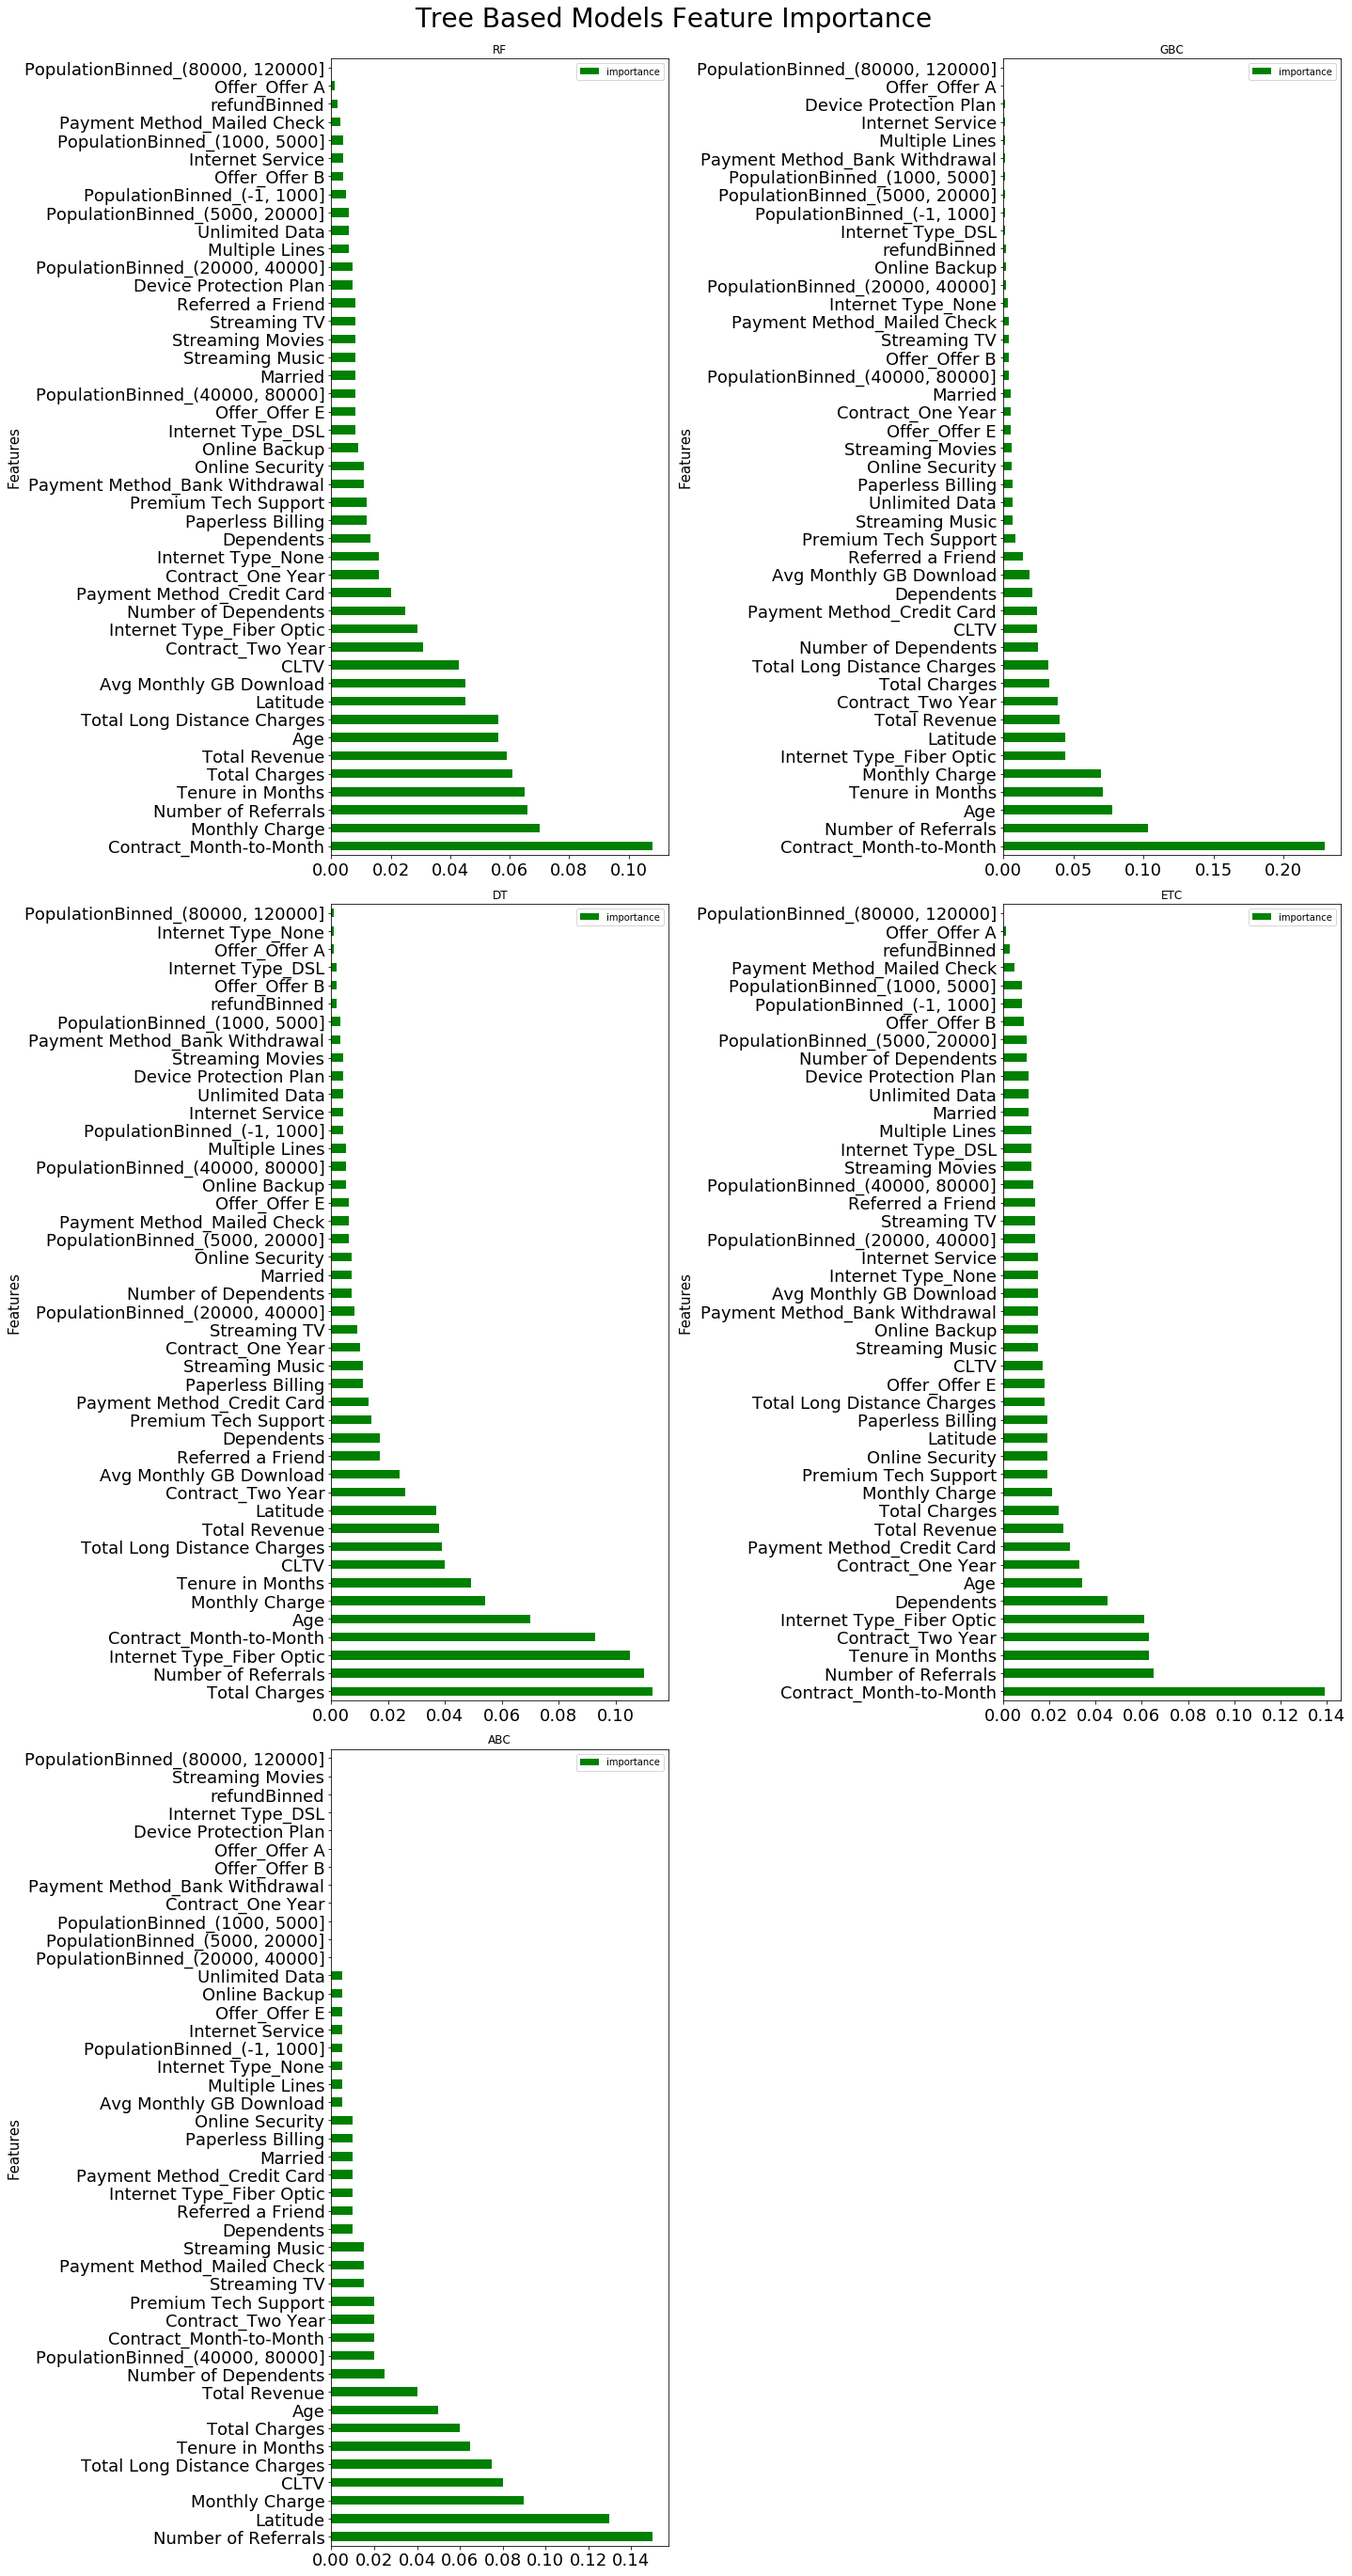

In [22]:
"""Create a function that plot feature importance by the selected tree based models."""
def plotFeatureImportance(model):
    """Return a plot of feature importance by model."""
    
    importance = pd.DataFrame({"feature": training_features.columns,
                              "importance": np.round(model.feature_importances_,3)})
    importanceSorted = importance.sort_values(by = "importance", ascending = False).set_index("feature")
    return importanceSorted

"""Create subplots of feature impotance of rf, gbc, dt, etc, and abc."""
fig, axes = plt.subplots(3,2, figsize = (20,40))
fig.suptitle("Tree Based Models Feature Importance", fontsize = 28)
treeModels = [random_forest, grad_boost, dec_tree, extra_trees, adaboost]
treeModelNames = ["RF", "GBC", "DT", "ETC", "ABC"]
for ax, model, name in zip(axes.flatten(), treeModels, treeModelNames):
    plotFeatureImportance(model).plot.barh(ax=ax, title=name, fontsize=18, color="green")
    ax.set_ylabel("Features", fontsize = 15)
fig.delaxes(ax = axes[2,1]) # We don"t need the last subplot.
fig.tight_layout(rect = [0, 0.03, 1, 0.97])

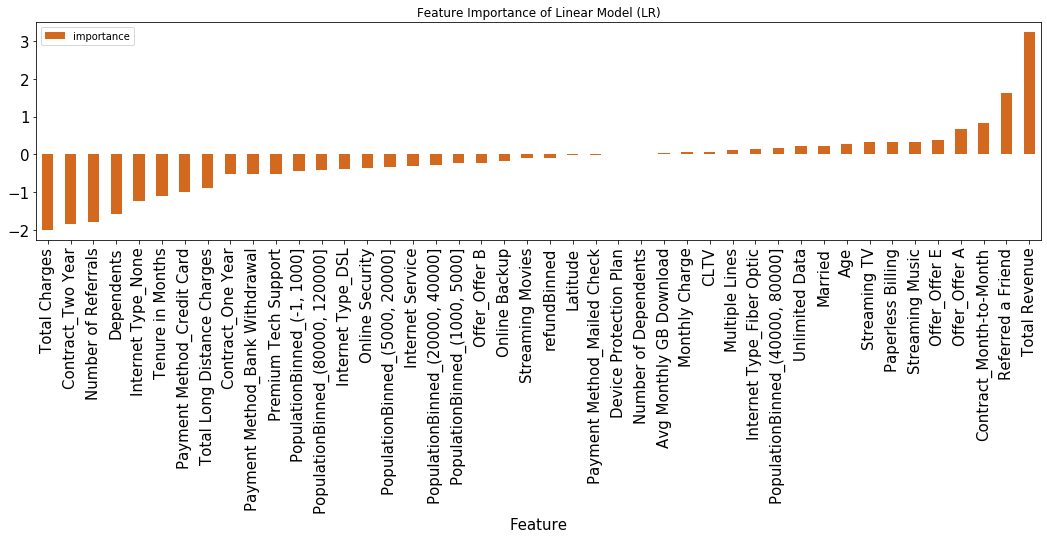

In [23]:
"""Let's plot feature importance of LR."""
fig, ax = plt.subplots(figsize=(18,4))
coeff = pd.DataFrame({"feature":training_features.columns,
                      "importance":np.transpose(logreg.coef_[0])})

coeff.sort_values(by = "importance").set_index("feature")\
.plot.bar(title = "Feature Importance of Linear Model (LR)", color="chocolate", ax=ax)
ax.tick_params(axis = "both", which = "major", labelsize = 15)
ax.tick_params(axis = "both", which = "minor", labelsize = 15)
ax.set_xlabel("Feature", fontsize = 15)
plt.show()

In [24]:
"""Create a function that returns learning curves for different classifiers."""
from sklearn.model_selection import learning_curve
def plotLearningCurve(model):
    """Returns a plot of learning curve of a model."""
    
    # Create feature matrix and target vector
    X, y = training_features, training_target
    # Create CV training and test scores for various training set sizes
    trainSizes, trainScores, testScores = learning_curve(model, X, y, cv = 10,
                                                    scoring="accuracy", n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17), # 17 different sizes of the training set
                                                    random_state = seed)
    # Create means and standard deviations of training set scores
    trainMean = np.mean(trainScores, axis = 1)
    trainStd = np.std(trainScores, axis = 1)

    # Create means and standard deviations of test set scores
    testMean = np.mean(testScores, axis = 1)
    testStd = np.std(testScores, axis = 1)

    # Draw lines
    plt.plot(trainSizes, trainMean, "o-", color = "red",  label = "training score")
    plt.plot(trainSizes, testMean, "o-", color = "green", label = "cross-validation score")
    
    # Draw bands
    plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r") # Alpha controls band transparency.
    plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "g")
    
    # Create plot
    font_size = 15
    plt.xlabel("Training Set Size", fontsize = font_size)
    plt.ylabel("Accuracy Score", fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = "best")
    plt.grid()

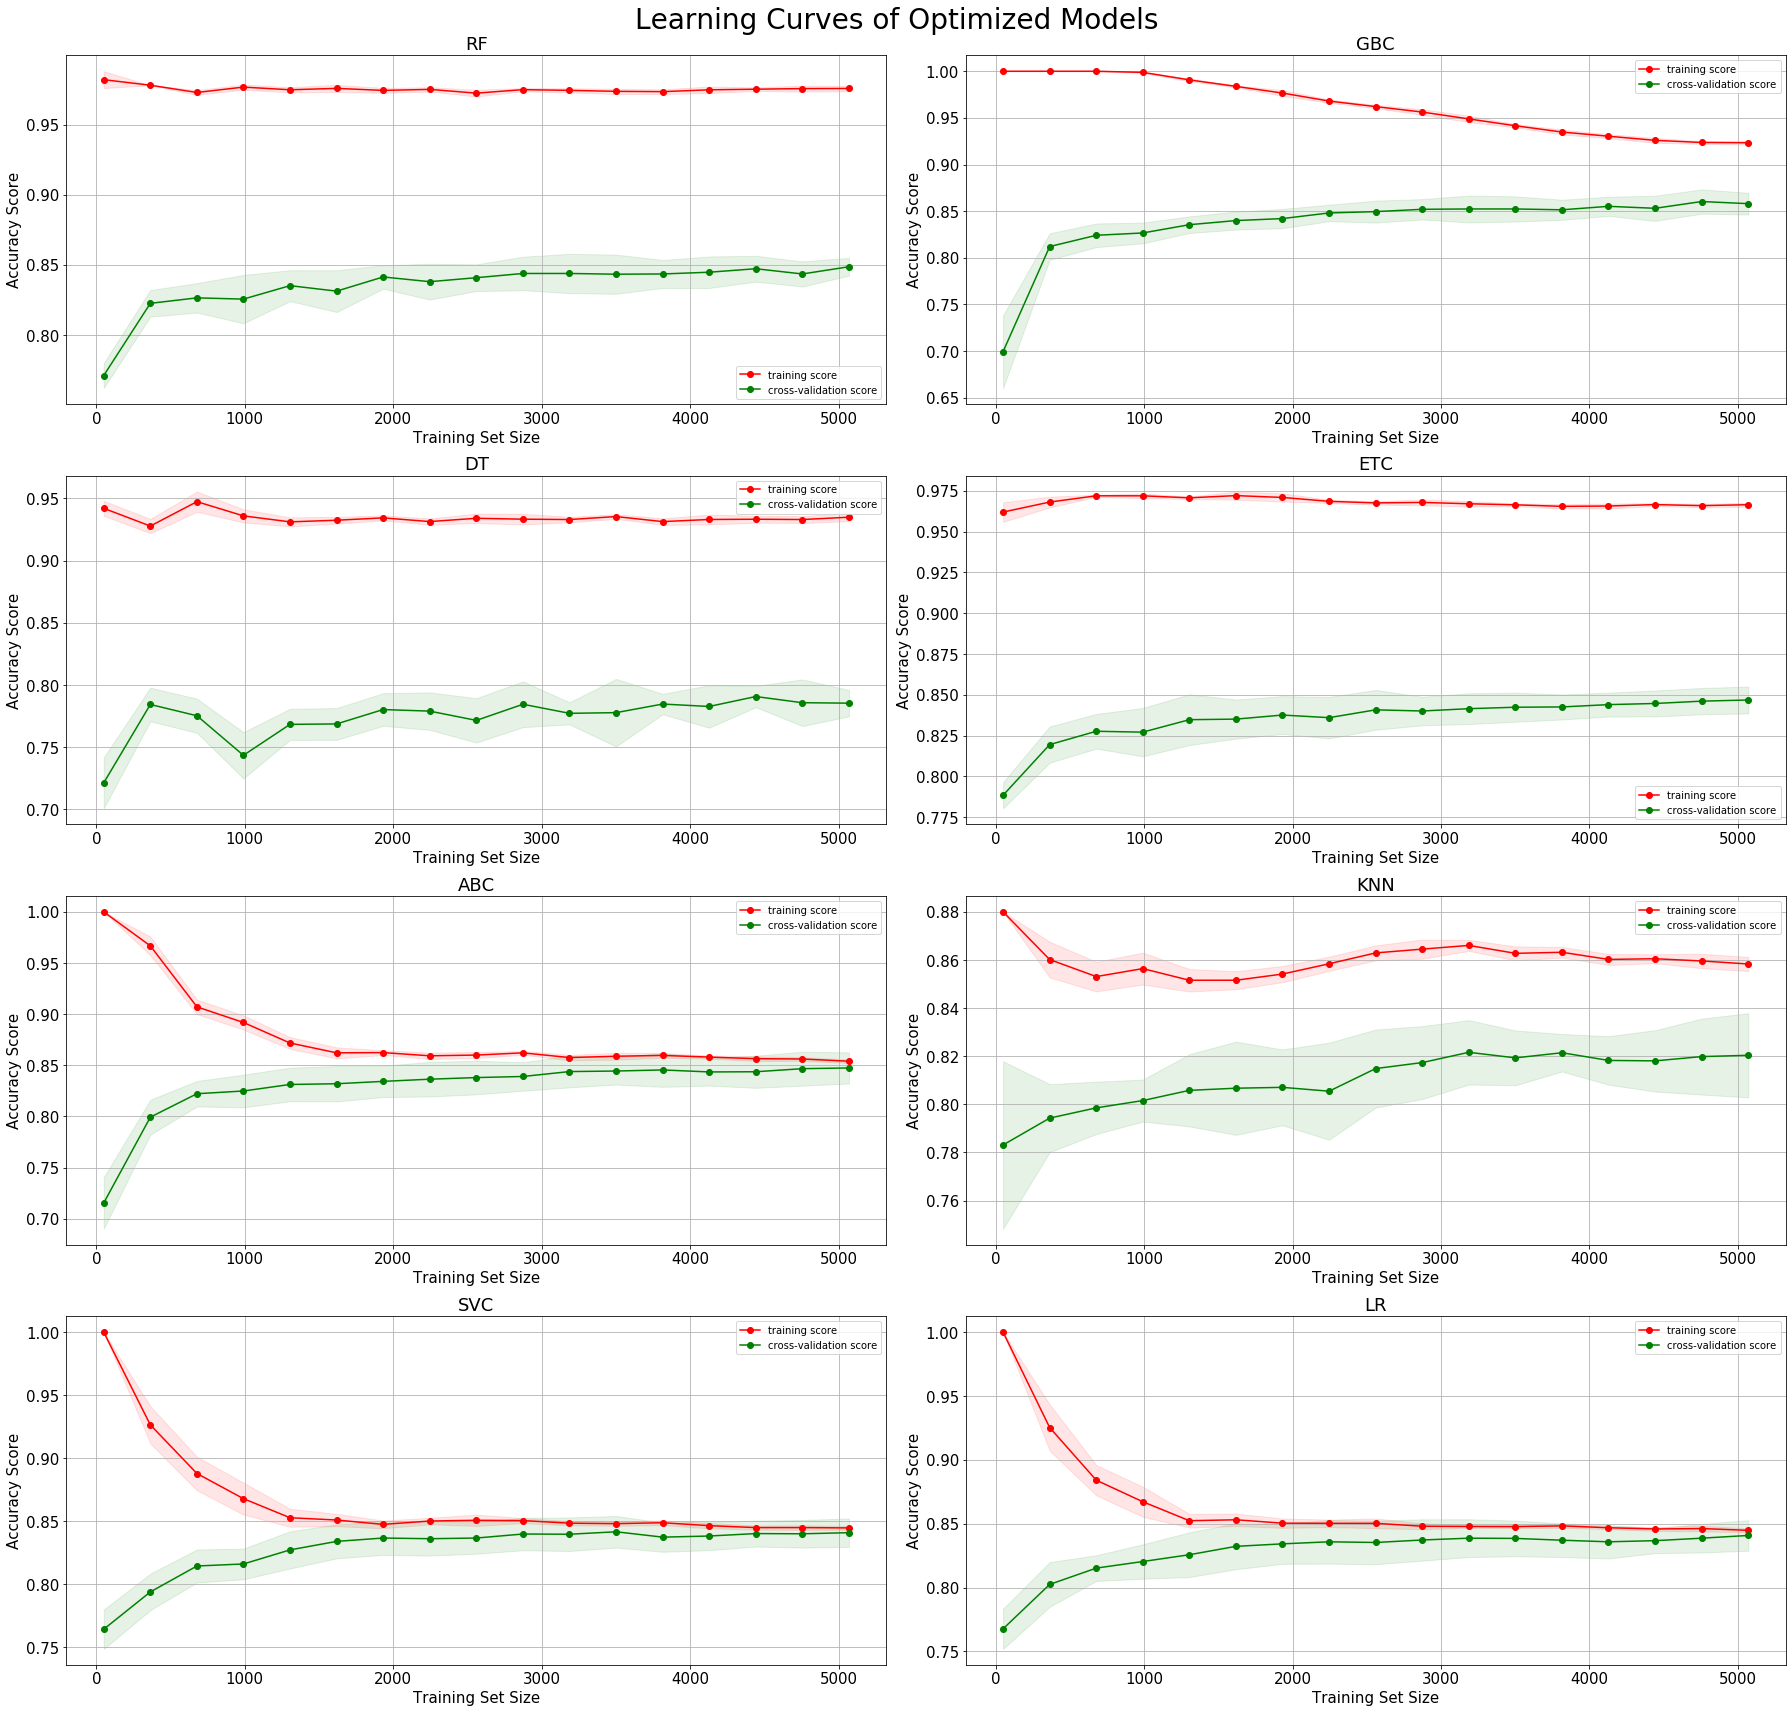

In [25]:
 """Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [random_forest, grad_boost, dec_tree, extra_trees, adaboost, knn, sup_vec, logreg]
lcLabels = ["RF", "GBC", "DT", "ETC", "ABC", "KNN", "SVC", "LR"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(4,2,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

## Evaluation metrics

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

### Accuracy on test set

In [59]:
def testing_scores_create():
    d = {}
    for label in lcLabels:
        d[label] = round(accuracy_score(modelPrediction[label].to_numpy(), testing_target) * 100, 2)
    
    return pd.DataFrame(data=d.values(), index=d.keys(), columns=["accuracy"])

testing_acc = testing_scores_create()
testing_acc

,accuracy
RF,83.11
GBC,84.46
DT,78.92
ETC,82.33
ABC,83.39
KNN,81.26
SVC,82.82
LR,82.68


### Confusion matrix

In [60]:
"""Return prediction to use it in another function."""
def xValPredict(model):
    """Returns prediction by which we can calculate different classification metrices."""
    
    predicted = cross_val_predict(model, training_features, training_target, cv = 10)
    return predicted # Now we can use it in another function by assigning the function to its return value.

"""Function to return confusion matrix."""
def calculateConfusionMatrix(model):
    """returns a models confusion matrix"""
    
    predicted = xValPredict(model)
    confusionMatrix = pd.crosstab(training_target, predicted, rownames = ["Actual"],
                                   colnames = ["Predicted/Classified"], margins = True)
    return display(confusionMatrix)

In [61]:
for model, label in zip(lcModels, lcLabels):
    print(label, " Confusion Matrix")
    calculateConfusionMatrix(model)
    print()

RF  Confusion Matrix


Predicted/Classified,0,1,All
Actual,,,
0,3817,308,4125
1,538,971,1509
All,4355,1279,5634



GBC  Confusion Matrix


Predicted/Classified,0,1,All
Actual,,,
0,3817,308,4125
1,479,1030,1509
All,4296,1338,5634



DT  Confusion Matrix


Predicted/Classified,0,1,All
Actual,,,
0,3641,484,4125
1,736,773,1509
All,4377,1257,5634



ETC  Confusion Matrix


Predicted/Classified,0,1,All
Actual,,,
0,3811,314,4125
1,545,964,1509
All,4356,1278,5634



ABC  Confusion Matrix


Predicted/Classified,0,1,All
Actual,,,
0,3749,376,4125
1,478,1031,1509
All,4227,1407,5634



KNN  Confusion Matrix


Predicted/Classified,0,1,All
Actual,,,
0,3736,389,4125
1,623,886,1509
All,4359,1275,5634



SVC  Confusion Matrix


Predicted/Classified,0,1,All
Actual,,,
0,3700,425,4125
1,473,1036,1509
All,4173,1461,5634



LR  Confusion Matrix


Predicted/Classified,0,1,All
Actual,,,
0,3700,425,4125
1,473,1036,1509
All,4173,1461,5634


### Precision Score

In [64]:
from sklearn.metrics import precision_score

In [67]:
"""Function to calculate precision score."""
def calculatePrecisionScore(model):
    """Calculates a model's precision score."""
    
    predicted = xValPredict(model)
    precisionScore = precision_score(training_target, predicted)
    return round(precisionScore*100, 2)

In [68]:
for model, label in zip(lcModels, lcLabels):
    print(f"{label}  Precision Score: {calculatePrecisionScore(model)}")

RF  Precision Score: 75.92
GBC  Precision Score: 76.98
DT  Precision Score: 61.5
ETC  Precision Score: 75.43
ABC  Precision Score: 73.28
KNN  Precision Score: 69.49
SVC  Precision Score: 70.91
LR  Precision Score: 70.91


### Recall (or Sensitivity or True Positive Rate) 

In [69]:
from sklearn.metrics import recall_score

In [73]:
"""Function to calculate recall score."""
def calculateRecallScore(model):
    """Calculate a model's recall score."""
    
    predicted = xValPredict(model)
    recallScore = recall_score(training_target, predicted)
    return round(recallScore*100, 2)

In [74]:
for model, label in zip(lcModels, lcLabels):
    print(f"{label}  Precision Score: {calculateRecallScore(model)}")

RF  Precision Score: 64.35
GBC  Precision Score: 68.26
DT  Precision Score: 51.23
ETC  Precision Score: 63.88
ABC  Precision Score: 68.32
KNN  Precision Score: 58.71
SVC  Precision Score: 68.65
LR  Precision Score: 68.65


### Specificity ( or True Negative Rate) 

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
"""Function for specificity score."""
def calculateSpecificityScore(model):
    """Returns a model's specificity score."""
    
    predicted = xValPredict(model)
    tn, fp, fn, tp = confusion_matrix(training_target, predicted).ravel()
    specificityScore = tn / (tn + fp)
    return round(specificityScore*100, 2)

In [77]:
for model, label in zip(lcModels, lcLabels):
    print(f"{label}  Precision Score: {calculateSpecificityScore(model)}")

RF  Precision Score: 92.53
GBC  Precision Score: 92.53
DT  Precision Score: 88.27
ETC  Precision Score: 92.39
ABC  Precision Score: 90.88
KNN  Precision Score: 90.57
SVC  Precision Score: 89.7
LR  Precision Score: 89.7


## F1 Score

In [78]:
from sklearn.metrics import f1_score

In [81]:
def calculateF1Score(model):
    """Returns a model's f1 score."""
    
    predicted = xValPredict(model)
    f1Score = f1_score(training_target, predicted)
    return round(f1Score*100, 2)

In [82]:
for model, label in zip(lcModels, lcLabels):
    print(f"{label}  Precision Score: {calculateF1Score(model)}")

RF  Precision Score: 69.66
GBC  Precision Score: 72.36
DT  Precision Score: 55.89
ETC  Precision Score: 69.18
ABC  Precision Score: 70.71
KNN  Precision Score: 63.65
SVC  Precision Score: 69.76
LR  Precision Score: 69.76


## Classification Report

In [86]:
from sklearn.metrics import classification_report

In [87]:
"""Function to compute classification report."""
def calculateClassificationReport(model):
    """Returns a model"s classification report."""
    
    predicted = xValPredict(model)
    classificationReport = classification_report(training_target, predicted)
    return print(classificationReport)

In [90]:
for model, label in zip(lcModels, lcLabels):
    print(label)
    calculateClassificationReport(model)
    print()

RF
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4125
           1       0.76      0.64      0.70      1509

    accuracy                           0.85      5634
   macro avg       0.82      0.78      0.80      5634
weighted avg       0.85      0.85      0.85      5634


GBC
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4125
           1       0.77      0.68      0.72      1509

    accuracy                           0.86      5634
   macro avg       0.83      0.80      0.82      5634
weighted avg       0.86      0.86      0.86      5634


DT
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      4125
           1       0.61      0.51      0.56      1509

    accuracy                           0.78      5634
   macro avg       0.72      0.70      0.71      5634
weighted avg       0.77      0.78      0.78      5634


ETC
  

## Ensamble methods

,RF,GBC,ABC,ETC,DT,SVC,KNN,LR
0,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,1,1,1,0,1,1,1
4,0,0,0,0,0,0,0,0


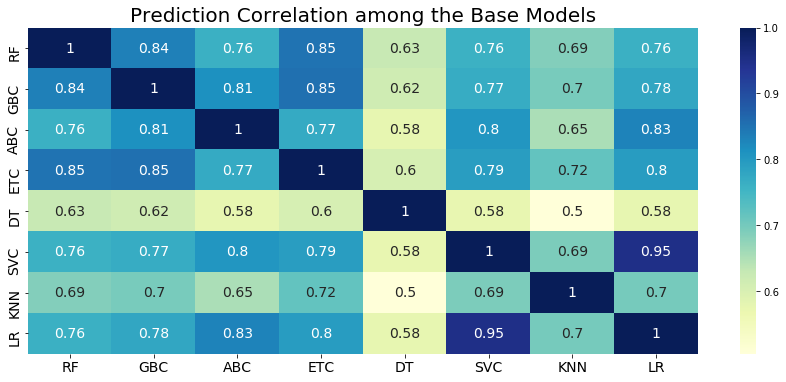

In [26]:
"""Create a data frame to store base models prediction.
First 5 in the dataframe are tree based models. Then two are kernel based. 
And the last is a linear model."""
basePrediction = modelPrediction # We"ve a df of all the models prediction.

"""Let"s see how each model classifies a prticular class."""
display(basePrediction.head())

"""Let"s visualize the correlations among the predictions of base models."""
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.heatmap(basePrediction.corr(), cmap ="YlGnBu", annot=True, annot_kws={"size":14}, ax=ax)
ax.set_title("Prediction Correlation among the Base Models", fontsize = 20)
ax.tick_params(axis = "both", which = "major", labelsize = 14)
ax.tick_params(axis = "both", which = "minor", labelsize = 14)
plt.show()

In [27]:
tunedScore = bestScoreAndHyperparametersSorted.iloc[:,0].sort_index().T.squeeze()
tunedScore.sort_values(ascending=False, inplace=True)
print(tunedScore)

Gradient Boosting Classifier    86.03
Random forests                  84.98
Adaboost Classifier             84.84
ExtraTrees Classifier           84.75
Logistic Regression             84.08
Support vector machines         84.06
KNN                             82.04
Decision Trees                  79.68
Name: tunedAccuracy, dtype: float64


In [28]:
#!pip install mlxtend

### Hard voting

In [29]:
from mlxtend.classifier import EnsembleVoteClassifier
"""We will use mlxtend library to train, predict and plot decision regions of hard voting ensemble classifier."""
"""Define base models for hard voting ensemble."""
baseModels = [random_forest, grad_boost, dec_tree, knn, logreg]

"""Initialize hard voting ensemble."""
hardVct = EnsembleVoteClassifier(clfs = baseModels, voting="hard")
print("Training Hard Voting Ensemble Classifier...")
display(hardVct.fit(training_features, training_target))
print("Done.")

"""Predict with hard voting ensemble."""
yPredHardVct = pd.DataFrame(hardVct.predict(testing_features), columns = ["hardVct"])
"""Hard voting cross validation score."""
print("\nComputing Hard Voting Cross Val Score...")
hardXValScore = cross_val_score(hardVct, training_features, training_target, cv = 10, scoring = "accuracy")
hardXValScore = round(hardXValScore.mean()*100, 2)
print("Done.")

"""Our tunned scores"""
tunedScore = bestScoreAndHyperparametersSorted.iloc[:,0]

"""Compare hard voting score with best base models scores."""
hardVctVsBaseScore = pd.DataFrame({"hardVsBaseScore(%)": [hardXValScore,
                                                          tunedScore["Random forests"],
                                                          tunedScore["Gradient Boosting Classifier"], 
                                                          tunedScore["Decision Trees"],
                                                          tunedScore["KNN"], 
                                                          tunedScore["Logistic Regression"]]
                                  })

"""So basically we"re comparing hard voting x_val_score with base models"s tunned score."""
hardVctVsBaseScore.index = ["hardVct", "Random Forests", "Gradient Boosting Classifier", "Decision Trees", "KNN", "Logistic Regression"]
display(hardVctVsBaseScore)

Training Hard Voting Ensemble Classifier...


EnsembleVoteClassifier(clfs=[RandomForestClassifier(max_features='sqrt',
                                                    min_samples_leaf=2,
                                                    min_samples_split=3,
                                                    n_estimators=30,
                                                    random_state=44),
                             GradientBoostingClassifier(learning_rate=0.05,
                                                        max_depth=6,
                                                        max_features=0.5,
                                                        min_samples_split=4,
                                                        random_state=0),
                             DecisionTreeClassifier(max_features='log2',
                                                    min_samples_leaf=2,
                                                    random_state=0),
                             KNeighborsClassifier(leaf_size=

Done.

Computing Hard Voting Cross Val Score...
Done.


,hardVsBaseScore(%)
hardVct,85.55
Random Forests,84.98
Gradient Boosting Classifier,86.03
Decision Trees,79.68
KNN,82.04
Logistic Regression,84.08


### Soft voting

In [93]:
"""Base models for soft voting is the base models of hard voting."""
"""Initialize soft voting ensemble."""
baseModels = [random_forest, grad_boost, dec_tree, knn, logreg]
softVct = EnsembleVoteClassifier(clfs = baseModels, voting = "soft")
print("Fitting Soft Voting Ensemble...")
display(softVct.fit(training_features, training_target))
print("Done.")

"""Predict with soft voting ensemble."""
yPredSoftVct = pd.DataFrame(softVct.predict(testing_features), columns = ["Soft_vct"])

"""Hard voting cross validation score."""
print("\nComputing Soft Voting X Val Score...")
softXValScore = cross_val_score(softVct, training_features, training_target, cv = 10, scoring = "accuracy")
softXValScore = round(softXValScore.mean()*100, 2)
print("Done.")

"""Compare hard voting score with best base models scores."""
softVsBaseScore = pd.DataFrame({"Soft_vs_base_score(%)": [softXValScore,
                                                          tunedScore["Random forests"],
                                                          tunedScore["Gradient Boosting Classifier"], 
                                                          tunedScore["Decision Trees"],
                                                          tunedScore["KNN"], 
                                                          tunedScore["Logistic Regression"]]
                                
                               })
"""So basically we"re comparing soft voting x_val_score with base models"s tunned score."""
softVsBaseScore.index = ["Soft_vct", "RF", "GBC", "DT", "KNN", "LR"]
display(softVsBaseScore)

Fitting Soft Voting Ensemble...


EnsembleVoteClassifier(clfs=[RandomForestClassifier(max_features='sqrt',
                                                    min_samples_leaf=2,
                                                    min_samples_split=3,
                                                    n_estimators=30,
                                                    random_state=44),
                             GradientBoostingClassifier(learning_rate=0.05,
                                                        max_depth=6,
                                                        max_features=0.5,
                                                        min_samples_split=4,
                                                        random_state=0),
                             DecisionTreeClassifier(max_features='log2',
                                                    min_samples_leaf=2,
                                                    random_state=0),
                             KNeighborsClassifier(leaf_size=

Done.

Computing Soft Voting X Val Score...
Done.


,Soft_vs_base_score(%)
Soft_vct,84.82
RF,84.98
GBC,86.03
DT,79.68
KNN,82.04
LR,84.08


### Bagging 

In [96]:
# !pip install mlens

In [97]:
from sklearn.ensemble import BaggingClassifier
from mlens.ensemble import BlendEnsemble

[MLENS] backend: threading


In [99]:
"""Initialize bagging classifier."""
bagg = BaggingClassifier(base_estimator = grad_boost, verbose = 0, n_jobs = -1, random_state = seed)
"""We use rf as the base estimator for bagging technique."""
print("Fitting Bagging Ensemble...")
display(bagg.fit(training_features, training_target))
print("Done.")

"""Bagging cross validation score."""
print("\nComputing Bagging X Val Score..")
baggXValScore = cross_val_score(bagg, training_features, training_target, cv = 10, scoring = "accuracy")
baggXValScore = np.round(baggXValScore.mean()*100, 2)
print("Done.")

"""Compare bagging ensemble score with best base models scores."""
baggVsBaseScore = pd.DataFrame({"Bagging_vs_base_score(%)": [baggXValScore,
                                                          tunedScore["Random forests"],
                                                          tunedScore["Gradient Boosting Classifier"], 
                                                          tunedScore["Decision Trees"],
                                                          tunedScore["KNN"], 
                                                          tunedScore["Logistic Regression"]]
                               })

"""So basically we"re comparing bagging x_val_score with base models"s tunned score."""
baggVsBaseScore.index = ["Bagg", "RF", "GBC", "DT", "KNN", "LR"]
display(baggVsBaseScore)

Fitting Bagging Ensemble...


BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                            max_depth=6,
                                                            max_features=0.5,
                                                            min_samples_split=4,
                                                            random_state=0),
                  n_jobs=-1, random_state=0)

Done.

Computing Bagging X Val Score..
Done.


,Bagging_vs_base_score(%)
Bagg,85.80
RF,84.98
GBC,86.03
DT,79.68
KNN,82.04
LR,84.08


### Boosting 

In [102]:
"""We will use adaptive boosting, gradient boosting and extreme gradient boosting"""
"""Initialize boosting classifier. Base models for boosting:"""
boostModels = [adaboost, grad_boost]
boost = EnsembleVoteClassifier(clfs = boostModels, voting="hard")

"""Fitting boosting."""
print("Fitting Boosting Ensemble...")
display(boost.fit(training_features, training_target))
print("Done.")

"""Boosting cross validation score."""
print("\nCalculating Boosting X Val Score...")
boosXValScore = cross_val_score(boost, training_features, training_target, cv = 10, scoring = "accuracy")
boosXValScore = round(boosXValScore.mean()*100, 2)
print("Done.")

"""Compare boosting ensemble score with best base models scores."""
xgbcXValScore = 82.27  # xgbc"s x_val_score.
boostVsBaseScore = pd.DataFrame({"Boosting_vs_base_score(%)": [boosXValScore,
                                                                  tunedScore["Adaboost Classifier"],
                                                                  tunedScore["Gradient Boosting Classifier"]
                                                             ]})
"""So basically we"re comparing boosting x_val_score with base models"s tunned score except xgbc."""
boostVsBaseScore.index = ["Boost", "ABC", "GBC"]
display(boostVsBaseScore)

Fitting Boosting Ensemble...


EnsembleVoteClassifier(clfs=[AdaBoostClassifier(learning_rate=0.3,
                                                n_estimators=200,
                                                random_state=0),
                             GradientBoostingClassifier(learning_rate=0.05,
                                                        max_depth=6,
                                                        max_features=0.5,
                                                        min_samples_split=4,
                                                        random_state=0)])

Done.

Calculating Boosting X Val Score...
Done.


,Boosting_vs_base_score(%)
Boost,85.68
ABC,84.84
GBC,86.03


In [31]:
bestScoreAndHyperparametersSorted['bestHyperparameters'][0]

{'learning_rate': 0.05,
 'max_depth': 6,
 'max_features': 0.5,
 'min_samples_split': 4,
 'random_state': 0}

In [37]:
print(bestScoreAndHyperparametersSorted)

                              tunedAccuracy  \
Gradient Boosting Classifier          86.03   
Random forests                        84.98   
Adaboost Classifier                   84.84   
ExtraTrees Classifier                 84.75   
Logistic Regression                   84.08   
Support vector machines               84.06   
KNN                                   82.04   
Decision Trees                        79.68   

                                                            bestHyperparameters  
Gradient Boosting Classifier  {'learning_rate': 0.05, 'max_depth': 6, 'max_f...  
Random forests                {'criterion': 'gini', 'max_features': 'sqrt', ...  
Adaboost Classifier           {'learning_rate': 0.3, 'n_estimators': 200, 'r...  
ExtraTrees Classifier         {'bootstrap': False, 'criterion': 'gini', 'max...  
Logistic Regression           {'C': 1291.5496650148827, 'max_iter': 2000, 'p...  
Support vector machines              {'C': 8, 'gamma': 0.5, 'kernel': 'linear'}  
KN